<a href="https://colab.research.google.com/github/arjunverma2004/CampusX-100-Days-of-Deep-Learning/blob/main/V33_EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sumanthvrao/daily-climate-time-series-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/daily-climate-time-series-data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/kaggle/input/daily-climate-time-series-data/DailyDelhiClimateTrain.csv')

In [4]:
df=df[['date', 'meantemp']]
df

,date,meantemp
0,2013-01-01,10.000000
1,2013-01-02,7.400000
2,2013-01-03,7.166667
3,2013-01-04,8.666667
4,2013-01-05,6.000000
...,...,...
1457,2016-12-28,17.217391
1458,2016-12-29,15.238095
1459,2016-12-30,14.095238
1460,2016-12-31,15.052632


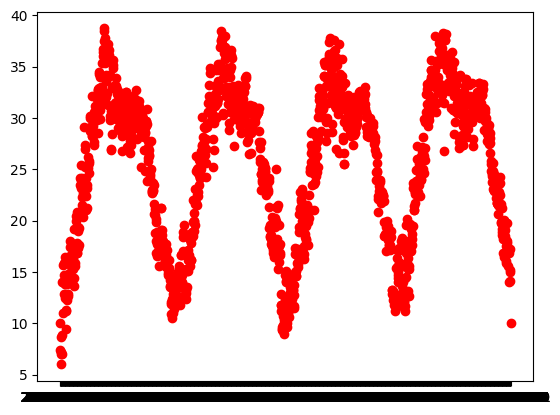

In [5]:
plt.scatter(df['date'], df['meantemp'],color='red')

In [7]:
x1 = df['meantemp'].ewm(alpha=0.9).mean() #TO calculate EWMA
#alpha = 1 - Beta

In [8]:
x1

,meantemp
0,10.000000
1,7.636364
2,7.213213
3,8.521452
4,6.252123
...,...
1457,17.180754
1458,15.432361
1459,14.228950
1460,14.970263


In [9]:
df['ewma']=x1
df

,date,meantemp,ewma
0,2013-01-01,10.000000,10.000000
1,2013-01-02,7.400000,7.636364
2,2013-01-03,7.166667,7.213213
3,2013-01-04,8.666667,8.521452
4,2013-01-05,6.000000,6.252123
...,...,...,...
1457,2016-12-28,17.217391,17.180754
1458,2016-12-29,15.238095,15.432361
1459,2016-12-30,14.095238,14.228950
1460,2016-12-31,15.052632,14.970263


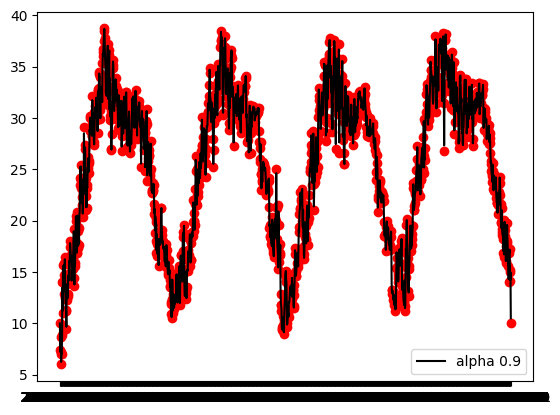

In [10]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x1, color='black', label='alpha 0.9')
plt.legend()
plt.show()